## 隨機梯度下降法(stochastic gradient descent,SGD)
用在更新參數的時候

梯度下降法(Gradient descent,GD)是一次用全部訓練集的數據去計算損失函數的梯度就更新一次參數。

SGD就是一次跑一個樣本或是小批次(mini-batch)樣本然後算出一次梯度或是小批次梯度的平均後就更新一次，那這個樣本或是小批次的樣本是隨機抽取的，所以才會稱為隨機梯度下降法。

SGD缺點
如果學習率太大，容易造成參數更新呈現鋸齒狀的更新，這是很沒有效率的路徑。


# 在鳶尾花資料集上繪製多類SGD

在鳶尾花資料集上繪製多類SGD的決策面。
對應於三個一對全（OVA）分類器的超平面用虛線表示。


In [1]:
#導入需要用到的套件
%matplotlib inline
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import SGDClassifier

Automatically created module for IPython interactive environment


In [2]:
# 載入鳶尾花資料集
iris = datasets.load_iris()

# 只用前兩個特徵值
X = iris.data[:, :2]
y = iris.target
colors = "bry"

In [3]:
# 隨機洗牌(shuffle)
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# 標準化(standardize)
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

h = .02  # 設定網格間隔

In [4]:
# 建立與訓練SGD分類器
clf = SGDClassifier(alpha=0.001, max_iter=100).fit(X, y)

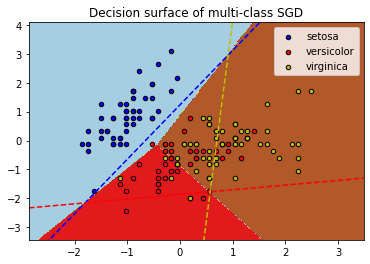

In [5]:
# 創建要繪製的網格
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# 畫出決策邊界(decision boundary)，同時也幫網格點上色
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# 幫結果上色
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')

# 幫訓練點上色
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired, edgecolor='black', s=20)
plt.title("Decision surface of multi-class SGD")
plt.axis('tight')

# 畫出三個一對全（OVA）分類器
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_


def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
             ls="--", color=color)


for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)
plt.legend()
plt.show()

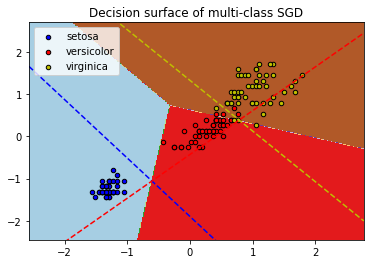

In [6]:
# 載入鳶尾花資料集
iris = datasets.load_iris()

# 只用後兩個特徵值
X = iris.data[:, 2:]
y = iris.target
colors = "bry"
# 隨機洗牌(shuffle)
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# 標準化(standardize)
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

h = .02  # 設定網格間隔
# 建立與訓練SGD分類器
clf = SGDClassifier(alpha=0.001, max_iter=100).fit(X, y)

# 創建要繪製的網格
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# 畫出決策邊界(decision boundary)，同時也幫網格點上色
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# 幫結果上色
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('tight')

# 幫訓練點上色
for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.Paired, edgecolor='black', s=20)
plt.title("Decision surface of multi-class SGD")
plt.axis('tight')

# 畫出三個一對全（OVA）分類器
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_


def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)],
             ls="--", color=color)


for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)
plt.legend()
plt.show()